# Credit Card Data Analysis and Visualisation 

In [1]:
""" This notebook performs analysis using EDA Techniques and other visualisation techniques on credit card dataset. We are using two detasets one is card details and oter customer details."""

' This notebook performs analysis using EDA Techniques and other visualisation techniques on credit card dataset. We are using two detasets one is card details and oter customer details.'

### importing necessary packages

In [2]:
import pandas as pd
# data processing, CSV file I/O (e.g. pd.read_csv)

import numpy as np
# linear algebra

import matplotlib.pyplot as plt
#generate plots

import seaborn as sns
#generate plots

from sklearn.model_selection import train_test_split
#Splits the dataset into training and testing sets.

from sklearn.preprocessing import StandardScaler
#Scales the features of the dataset to have zero mean and unit variance.

from sklearn.ensemble import IsolationForest
#Detects anomalies or outliers in the dataset.

from sklearn.cluster import DBSCAN
#Performs clustering of data points.

from sklearn.metrics import accuracy_score, f1_score
#Evaluate the performance of a classification model.

from sklearn.linear_model import LogisticRegression
#A machine learning algorithm for binary classification.

### load the data

In [3]:
credit_card_df = pd.read_csv('E:\creditCardDataAnalysis\credit_card.csv')
customer_df = pd.read_csv('E:\creditCardDataAnalysis\customer.csv')

### viewing the datasets

In [4]:
credit_card_df.head()

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Use Chip,Exp Type,Interest_Earned,Delinquent_Acc
0,708082083,Blue,200,0,87,01-01-2023,Week-1,Q1,2023,3544.0,1661,15149,111,0.469,Chip,Travel,4393.21,0
1,708083283,Blue,445,1,108,01-01-2023,Week-1,Q1,2023,3421.0,2517,992,21,0.736,Swipe,Entertainment,69.44,0
2,708084558,Blue,140,0,106,01-01-2023,Week-1,Q1,2023,8258.0,1771,1447,23,0.214,Chip,Bills,202.58,0
3,708085458,Blue,250,1,150,01-01-2023,Week-1,Q1,2023,1438.3,0,3940,82,0.000,Online,Grocery,236.40,0
4,708086958,Blue,320,1,106,01-01-2023,Week-1,Q1,2023,3128.0,749,4369,59,0.239,Swipe,Fuel,1004.87,1


In [5]:
customer_df.head()

,Client_Num,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,state_cd,Zipcode,Car_Owner,House_Owner,Personal_loan,contact,Customer_Job,Income,Cust_Satisfaction_Score
0,708082083,24,F,1,Uneducated,Single,FL,91750,no,yes,no,unknown,Businessman,202326,3
1,708083283,62,F,0,Unknown,Married,NJ,91750,no,no,no,cellular,Selfemployeed,5225,2
2,708084558,32,F,1,Unknown,Married,NJ,91750,yes,no,no,unknown,Selfemployeed,14235,2
3,708085458,38,M,2,Uneducated,Single,NY,91750,no,no,no,cellular,Blue-collar,45683,1
4,708086958,48,M,4,Graduate,Single,TX,91750,yes,yes,no,cellular,Businessman,59279,1


### Display basic info

In [6]:
print("Credit Card Data Info:")
print(credit_card_df.info())
print("\nCustomer Data Info:")
print(customer_df.info())

Credit Card Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10108 entries, 0 to 10107
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client_Num             10108 non-null  int64  
 1   Card_Category          10108 non-null  object 
 2   Annual_Fees            10108 non-null  int64  
 3   Activation_30_Days     10108 non-null  int64  
 4   Customer_Acq_Cost      10108 non-null  int64  
 5   Week_Start_Date        10108 non-null  object 
 6   Week_Num               10108 non-null  object 
 7   Qtr                    10108 non-null  object 
 8   current_year           10108 non-null  int64  
 9   Credit_Limit           10108 non-null  float64
 10  Total_Revolving_Bal    10108 non-null  int64  
 11  Total_Trans_Amt        10108 non-null  int64  
 12  Total_Trans_Vol        10108 non-null  int64  
 13  Avg_Utilization_Ratio  10108 non-null  float64
 14  Use Chip               10108 no

### Display Summary Statistics

In [7]:
print("\nCredit Card Data Summary:")
print(credit_card_df.describe())


Credit Card Data Summary:
         Client_Num   Annual_Fees  Activation_30_Days  Customer_Acq_Cost  \
count  1.010800e+04  10108.000000        10108.000000       10108.000000   
mean   7.390104e+08    291.849525            0.574693          96.254056   
std    3.673623e+07    118.339384            0.494414          25.768677   
min    7.080821e+08     95.000000            0.000000          40.000000   
25%    7.130267e+08    195.000000            0.000000          79.000000   
50%    7.179037e+08    295.000000            1.000000          95.000000   
75%    7.727989e+08    395.000000            1.000000         112.000000   
max    8.278908e+08    500.000000            1.000000         172.000000   

       current_year  Credit_Limit  Total_Revolving_Bal  Total_Trans_Amt  \
count       10108.0  10108.000000         10108.000000     10108.000000   
mean         2023.0   8635.642808          1162.792145      4404.631282   
std             0.0   9093.136113           815.160709      339

In [8]:
print("\nCustomer Data Summary:")
print(customer_df.describe())


Customer Data Summary:
         Client_Num  Customer_Age  Dependent_Count       Zipcode  \
count  1.010800e+04  10108.000000     10108.000000  10108.000000   
mean   7.390104e+08     46.274436         2.345370  91663.071824   
std    3.673623e+07      8.087876         1.299486   1693.093868   
min    7.080821e+08     21.000000         0.000000  53010.000000   
25%    7.130267e+08     41.000000         1.000000  91750.000000   
50%    7.179037e+08     46.000000         2.000000  91750.000000   
75%    7.727989e+08     52.000000         3.000000  91750.000000   
max    8.278908e+08     73.000000         5.000000  99504.000000   

              Income  Cust_Satisfaction_Score  
count   10108.000000             10108.000000  
mean    56976.101998                 3.189256  
std     46183.718233                 1.263101  
min      1250.000000                 1.000000  
25%     22635.750000                 2.000000  
50%     44768.500000                 3.000000  
75%     76392.750000       

### Check for missing values

In [9]:
print("\nMissing Values in Credit Card Data:")
print(credit_card_df.isnull().sum())


Missing Values in Credit Card Data:
Client_Num               0
Card_Category            0
Annual_Fees              0
Activation_30_Days       0
Customer_Acq_Cost        0
Week_Start_Date          0
Week_Num                 0
Qtr                      0
current_year             0
Credit_Limit             0
Total_Revolving_Bal      0
Total_Trans_Amt          0
Total_Trans_Vol          0
Avg_Utilization_Ratio    0
Use Chip                 0
Exp Type                 0
Interest_Earned          0
Delinquent_Acc           0
dtype: int64


In [10]:
print("\nMissing Values in Customer Data:")
print(customer_df.isnull().sum())


Missing Values in Customer Data:
Client_Num                 0
Customer_Age               0
Gender                     0
Dependent_Count            0
Education_Level            0
Marital_Status             0
state_cd                   0
Zipcode                    0
Car_Owner                  0
House_Owner                0
Personal_loan              0
contact                    0
Customer_Job               0
Income                     0
Cust_Satisfaction_Score    0
dtype: int64


### Outlier Detection and Correction

In [11]:
# Detecting outliers using Z-score
from scipy.stats import zscore

In [12]:
# Detect and handle outliers for multiple columns
def handle_outliers(df, columns, method='zscore', threshold=3):
    for col in columns:
        if method == 'zscore':
            df = df[(np.abs(zscore(df[col])) < threshold)]
        elif method == 'iqr':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            df = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]
    return df

# Columns to check for outliers
numeric_columns = ['Total_Trans_Amt', 'Total_Revolving_Bal']
credit_card_df_cleaned = handle_outliers(credit_card_df, numeric_columns)

# Summary of cleaned data
print("Cleaned Credit Card Data Summary:")
print(credit_card_df_cleaned.describe())


Cleaned Credit Card Data Summary:
         Client_Num  Annual_Fees  Activation_30_Days  Customer_Acq_Cost  \
count  9.719000e+03  9719.000000         9719.000000        9719.000000   
mean   7.390944e+08   291.893713            0.573824          96.204239   
std    3.677920e+07   118.320648            0.494545          25.821182   
min    7.080833e+08    95.000000            0.000000          40.000000   
25%    7.130348e+08   195.000000            0.000000          79.000000   
50%    7.178934e+08   295.000000            1.000000          95.000000   
75%    7.731435e+08   395.000000            1.000000         112.000000   
max    8.278908e+08   500.000000            1.000000         172.000000   

       current_year  Credit_Limit  Total_Revolving_Bal  Total_Trans_Amt  \
count        9719.0   9719.000000          9719.000000      9719.000000   
mean         2023.0   8420.524797          1153.646157      3960.207223   
std             0.0   8958.860666           817.764756      2618.

### Merging dataset assuming their is common coloumn

In [13]:
credit_card_df.columns = credit_card_df.columns.str.strip()
customer_df.columns = customer_df.columns.str.strip()

# Check the column names again after stripping spaces
print("\nColumns in Credit Card Data (after stripping spaces):")
print(credit_card_df.columns)
print("\nColumns in Customer Data (after stripping spaces):")
print(customer_df.columns)

# Merge the datasets using the common column (assuming 'Client_Num' is the common column)
merged_df = pd.merge(credit_card_df_cleaned, customer_df, on='Client_Num')

print("Merged Data Info:")
print(merged_df.info())


Columns in Credit Card Data (after stripping spaces):
Index(['Client_Num', 'Card_Category', 'Annual_Fees', 'Activation_30_Days',
       'Customer_Acq_Cost', 'Week_Start_Date', 'Week_Num', 'Qtr',
       'current_year', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Trans_Amt', 'Total_Trans_Vol', 'Avg_Utilization_Ratio',
       'Use Chip', 'Exp Type', 'Interest_Earned', 'Delinquent_Acc'],
      dtype='object')

Columns in Customer Data (after stripping spaces):
Index(['Client_Num', 'Customer_Age', 'Gender', 'Dependent_Count',
       'Education_Level', 'Marital_Status', 'state_cd', 'Zipcode', 'Car_Owner',
       'House_Owner', 'Personal_loan', 'contact', 'Customer_Job', 'Income',
       'Cust_Satisfaction_Score'],
      dtype='object')
Merged Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9719 entries, 0 to 9718
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Client_Num  

### Exploratory Data Analysis

C:\Users\MEHWISH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


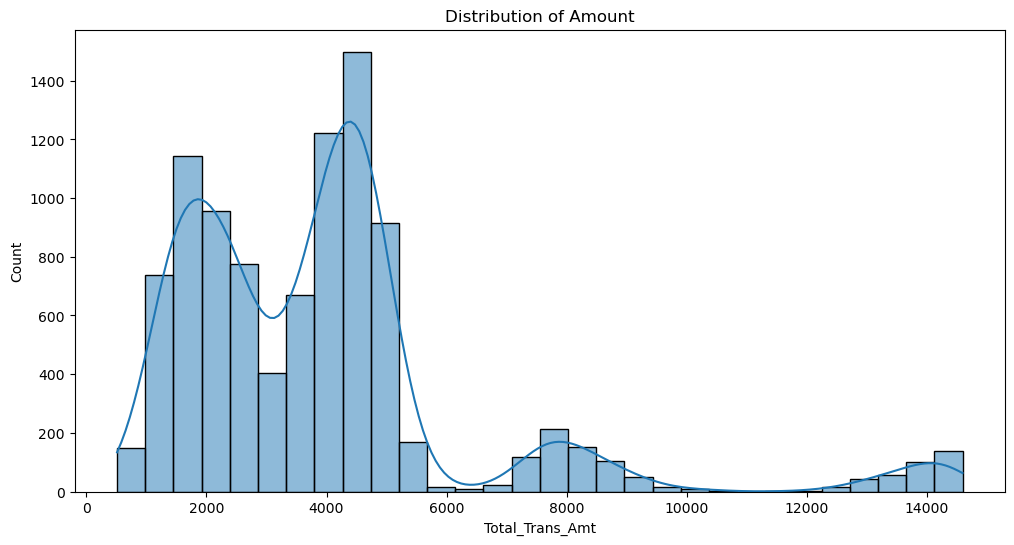

In [14]:
# Histograms
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['Total_Trans_Amt'], bins=30, kde=True)
plt.title('Distribution of Amount')
plt.show()


C:\Users\MEHWISH\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


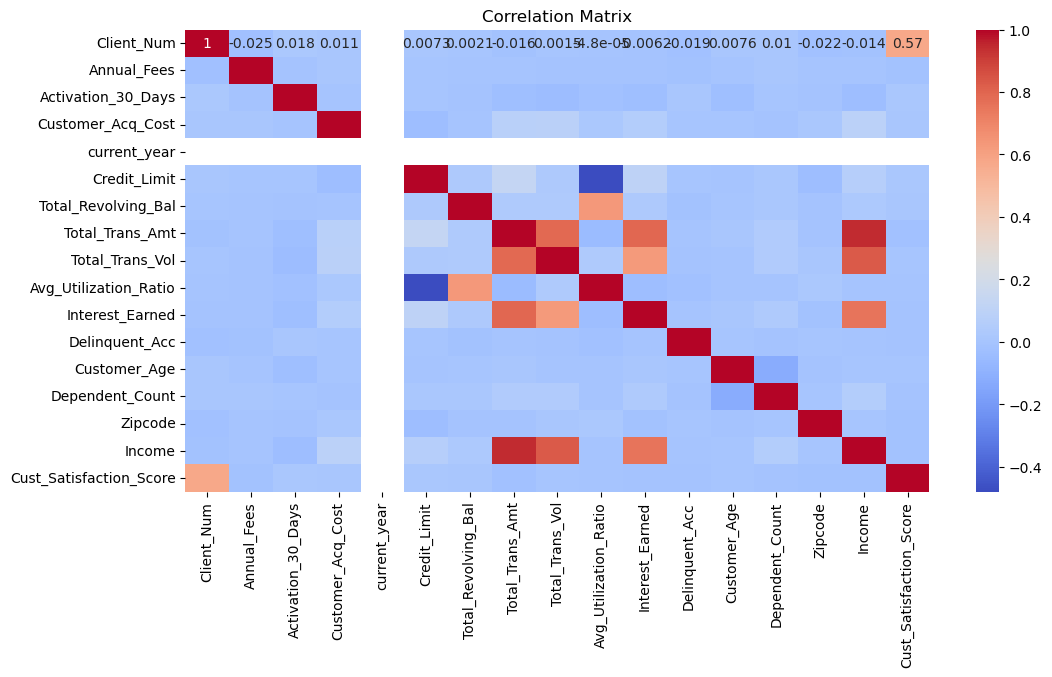

In [15]:
# Select only numeric columns for the correlation matrix
numeric_cols = merged_df.select_dtypes(include=[np.number]).columns


# Correlation Matrix
plt.figure(figsize=(12, 6))
sns.heatmap(merged_df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


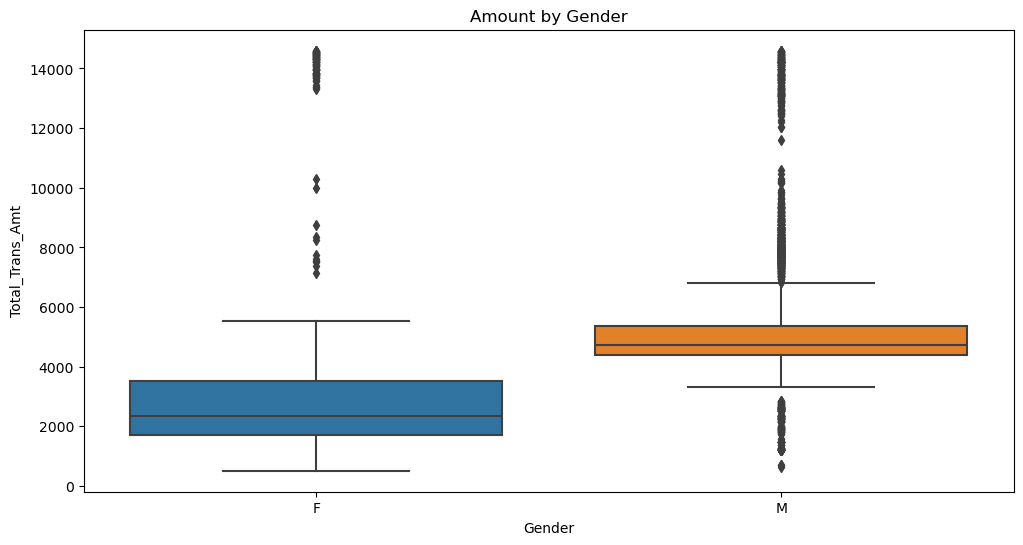

In [16]:
# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x=merged_df['Gender'], y=merged_df['Total_Trans_Amt'])
plt.title('Amount by Gender')
plt.show()


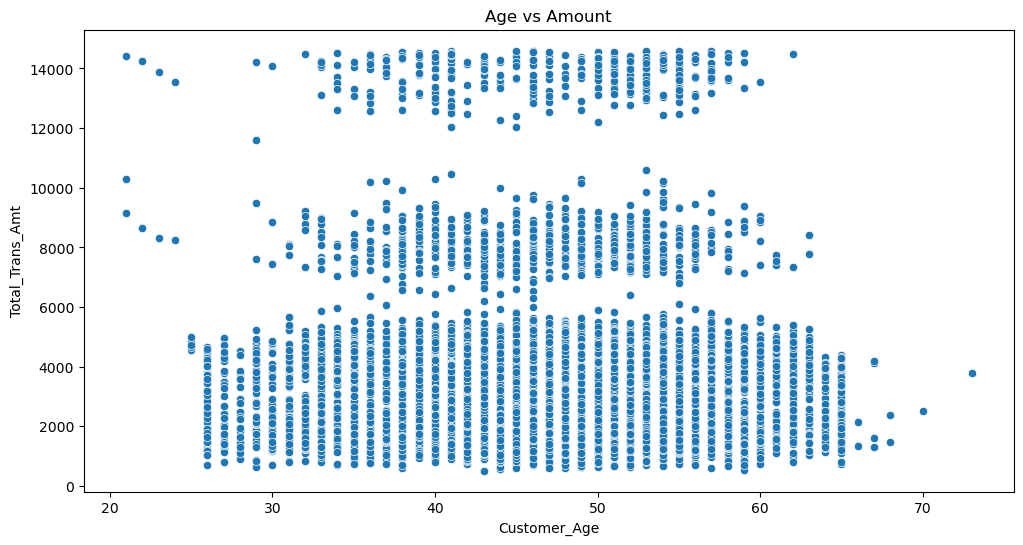

In [17]:
# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=merged_df['Customer_Age'], y=merged_df['Total_Trans_Amt'])
plt.title('Age vs Amount')
plt.show()

### Feature Engineering and Model Building

In [19]:
merged_df['BalanceToIncomeRatio'] = merged_df['Total_Revolving_Bal'] / merged_df['Income']
merged_df['TransactionPerAge'] = merged_df['Total_Trans_Amt'] / merged_df['Customer_Age']

# Encode categorical variables
merged_df = pd.get_dummies(merged_df, drop_first=True)

# Display new features
print("Enhanced Data Info:")
print(merged_df.info())

Enhanced Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9719 entries, 0 to 9718
Columns: 179 entries, Client_Num to Customer_Job_White-collar
dtypes: bool(160), float64(5), int64(14)
memory usage: 2.9 MB
None


In [20]:
merged_df['AgeGroup'] = pd.cut(merged_df['Customer_Age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '66-100'])

# Display new features
print("Enhanced Data Info:")
print(merged_df.info())

Enhanced Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9719 entries, 0 to 9718
Columns: 180 entries, Client_Num to AgeGroup
dtypes: bool(160), category(1), float64(5), int64(14)
memory usage: 2.9 MB
None


### Model Building

In [21]:
# Encode categorical variables
merged_df = pd.get_dummies(merged_df, drop_first=True)

In [22]:
# Split data
X = merged_df.drop(['Total_Trans_Amt'], axis=1)
y = merged_df['Total_Trans_Amt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)


C:\Users\MEHWISH\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
# Predictions and Evaluation
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")

Accuracy: 0.00051440329218107
F1 Score: 0.000257201646090535


In [28]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [29]:
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse


In [30]:
# Split data
X = merged_df.drop(['Total_Trans_Amt'], axis=1)
y = merged_df['Total_Trans_Amt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# Random Forest Model
#A Random Forest is an ensemble learning method used for classification and regression tasks. It operates by constructing multiple decision trees during training and outputting the class (classification) or mean prediction (regression) of the individual trees.
rf_model = RandomForestRegressor()
rf_mse = evaluate_model(rf_model, X_train, X_test, y_train, y_test)
print(f"Random Forest MSE: {rf_mse}")


Random Forest MSE: 175.4395784979425


In [33]:
# Gradient Boosting Model
gb_model = GradientBoostingRegressor()
gb_mse = evaluate_model(gb_model, X_train, X_test, y_train, y_test)
print(f"Gradient Boosting MSE: {gb_mse}")

Gradient Boosting MSE: 769.5895527115438


## Dashboard

In [34]:
import plotly.graph_objects as go

In [36]:
from dash import Dash, html, dcc, Input, Output
# Import Dash components for more interactive visualizations

import plotly.express as px

app = Dash(__name__, suppress_callback_exceptions=True)

app.layout = html.Div([
    html.H1("Credit Card Data Analysis Dashboard"),
    dcc.Tabs(id="tabs", value='tab-1', children=[
        dcc.Tab(label='Total Transactions Amount Distribution', value='tab-1'),
        dcc.Tab(label='Correlation Matrix', value='tab-2')
    ]),
    html.Div(id='tabs-content')
])

@app.callback(Output('tabs-content', 'children'),
              [Input('tabs', 'value')])
def render_content(tab):
    if tab == 'tab-1':
        return html.Div([
            dcc.Graph(id='total-trans-amt-distribution'),
            dcc.Slider(
                id='total-trans-amt-slider',
                min=merged_df['Total_Trans_Amt'].min(),
                max=merged_df['Total_Trans_Amt'].max(),
                value=merged_df['Total_Trans_Amt'].max() / 2,
                marks={str(amount): str(amount) for amount in range(int(merged_df['Total_Trans_Amt'].min()), int(merged_df['Total_Trans_Amt'].max()) + 1, 5000)},
                step=5000
            )
        ])
    elif tab == 'tab-2':
        return html.Div([
            dcc.Graph(
                figure=px.imshow(merged_df[numeric_cols].corr(), text_auto=True, aspect="auto", title="Correlation Matrix")
            )
        ])

@app.callback(
    Output('total-trans-amt-distribution', 'figure'),
    [Input('total-trans-amt-slider', 'value')]
)
def update_figure(selected_amount):
    filtered_df = merged_df[merged_df['Total_Trans_Amt'] <= selected_amount]
    fig = px.histogram(filtered_df, x="Total_Trans_Amt", nbins=50, title="Distribution of Total Transactions Amount")
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)
